In [1]:
import pandas as pd

df = pd.read_csv("../dataset/sales.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   str    
 2   Order Date     9800 non-null   str    
 3   Ship Date      9800 non-null   str    
 4   Ship Mode      9800 non-null   str    
 5   Customer ID    9800 non-null   str    
 6   Customer Name  9800 non-null   str    
 7   Segment        9800 non-null   str    
 8   Country        9800 non-null   str    
 9   City           9800 non-null   str    
 10  State          9800 non-null   str    
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   str    
 13  Product ID     9800 non-null   str    
 14  Category       9800 non-null   str    
 15  Sub-Category   9800 non-null   str    
 16  Product Name   9800 non-null   str    
 17  Sales          9800 non-null   float64
dtypes: float64(2), int6

In [3]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [4]:
df['Postal Code'].fillna(0,inplace=True)

C:\Users\SWATHI M\AppData\Local\Temp\ipykernel_20320\2861631557.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Postal Code'].fillna(0,inplace=True)


0       42420.0
1       42420.0
2       90036.0
3       33311.0
4       33311.0
         ...   
9795    60610.0
9796    43615.0
9797    43615.0
9798    43615.0
9799    43615.0
Name: Postal Code, Length: 9800, dtype: float64

In [5]:
df['Postal Code'] = df['Postal Code'].fillna(0)

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

ValueError: time data "15/04/2018" doesn't match format "%m/%d/%Y". You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [10]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [11]:
df.dtypes

Row ID                    int64
Order ID                    str
Order Date       datetime64[us]
Ship Date        datetime64[us]
Ship Mode                   str
Customer ID                 str
Customer Name               str
Segment                     str
Country                     str
City                        str
State                       str
Postal Code             float64
Region                      str
Product ID                  str
Category                    str
Sub-Category                str
Product Name                str
Sales                   float64
dtype: object

In [12]:
df['Year'] = df['Order Date'].dt.year

In [13]:
df['Month'] = df['Order Date'].dt.month

In [14]:
df[['Order Date', 'Year', 'Month']].head()

,Order Date,Year,Month
0,2017-11-08,2017,11
1,2017-11-08,2017,11
2,2017-06-12,2017,6
3,2016-10-11,2016,10
4,2016-10-11,2016,10


In [15]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum()

In [16]:
monthly_sales.head()

Year  Month
2015  1        14205.707
      2         4519.892
      3        55205.797
      4        27906.855
      5        23644.303
Name: Sales, dtype: float64

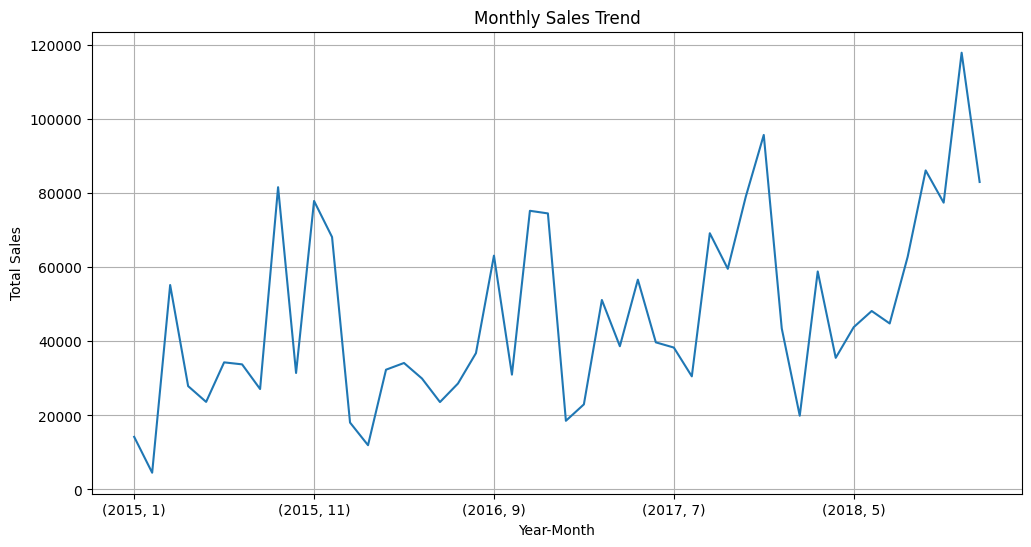

In [17]:
import matplotlib.pyplot as plt

monthly_sales.plot(figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [18]:
region_sales = df.groupby('Region')['Sales'].sum()

region_sales.sort_values(ascending=False)

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

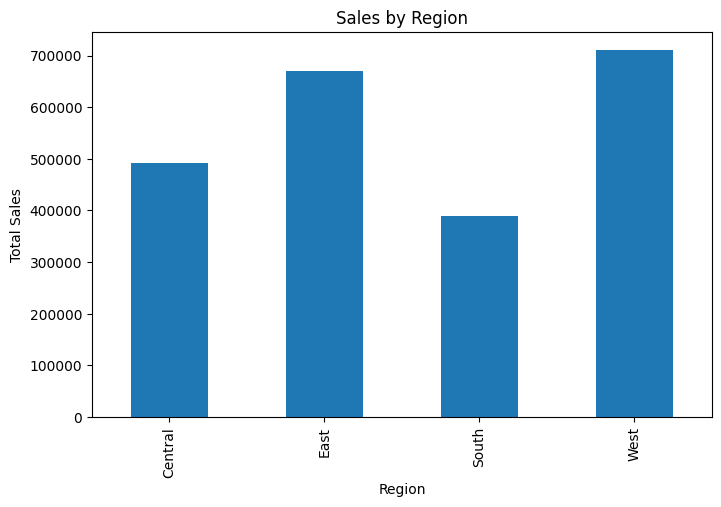

In [19]:
region_sales.plot(kind='bar', figsize=(8,5))
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()


In [20]:
category_sales = df.groupby('Category')['Sales'].sum()

category_sales.sort_values(ascending=False)


Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

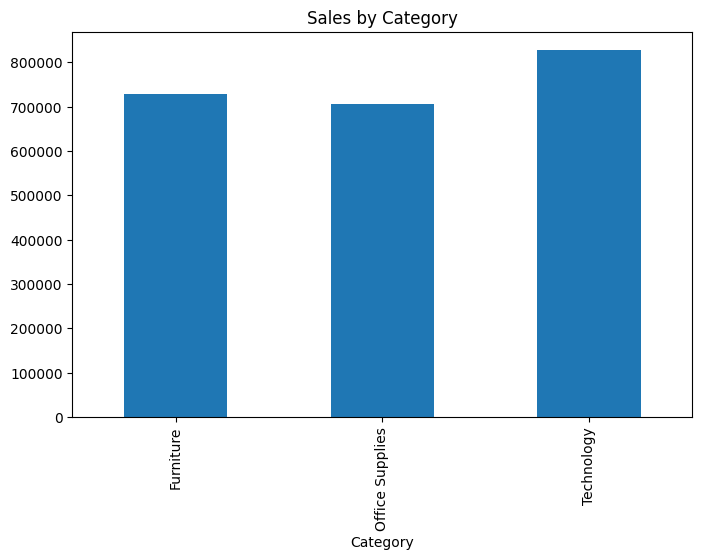

In [21]:
category_sales.plot(kind='bar', figsize=(8,5))
plt.title("Sales by Category")
plt.show()


In [22]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_products


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

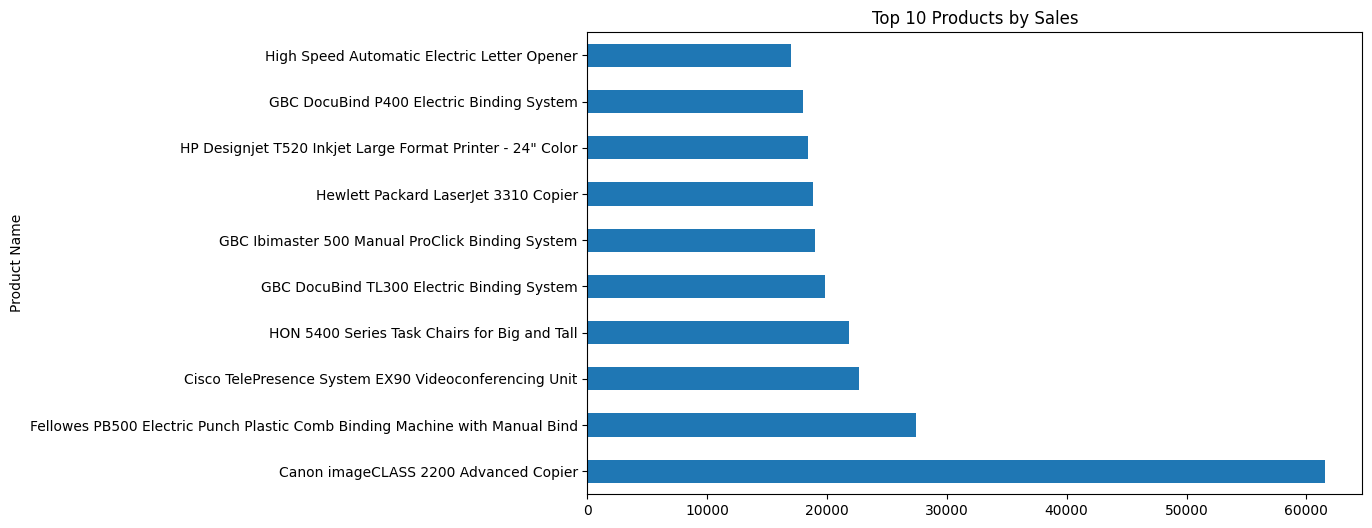

In [23]:
top_products.plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Products by Sales")
plt.show()


In [24]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - --------------------


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
ml_df = df[['Year', 'Month', 'Category', 'Region', 'Sales']]

In [33]:
ml_df.head()

,Year,Month,Category,Region,Sales
0,2017,11,Furniture,South,261.9600
1,2017,11,Furniture,South,731.9400
2,2017,6,Office Supplies,West,14.6200
3,2016,10,Furniture,South,957.5775
4,2016,10,Office Supplies,South,22.3680


In [34]:
ml_df = pd.get_dummies(ml_df, columns=['Category', 'Region'])
ml_df.head()

,Year,Month,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Region_Central,Region_East,Region_South,Region_West
0,2017,11,261.9600,True,False,False,False,False,True,False
1,2017,11,731.9400,True,False,False,False,False,True,False
2,2017,6,14.6200,False,True,False,False,False,False,True
3,2016,10,957.5775,True,False,False,False,False,True,False
4,2016,10,22.3680,False,True,False,False,False,True,False


In [35]:
X = ml_df.drop('Sales', axis=1)
y = ml_df['Sales']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [38]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r2_score(y_test, y_pred)


0.04094588904042373

In [39]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import joblib

joblib.dump(model, "sales_prediction_model.pkl")

['sales_prediction_model.pkl']

In [41]:
from fastapi import FastAPI
import joblib
import pandas as pd

app = FastAPI()

model = joblib.load("sales_prediction_model.pkl")

@app.get("/")
def home():
    return {"message": "Sales Prediction API running"}

@app.post("/predict")
def predict(year: int, month: int):
    data = pd.DataFrame([[year, month]], columns=["Year", "Month"])
    prediction = model.predict(data)
    return {"predicted_sales": float(prediction[0])}


ModuleNotFoundError: No module named 'fastapi'

In [42]:
X.columns

Index(['Year', 'Month', 'Category_Furniture', 'Category_Office Supplies',
       'Category_Technology', 'Region_Central', 'Region_East', 'Region_South',
       'Region_West'],
      dtype='str')

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib

# Features and target
X = df[['Year', 'Month', 'Category', 'Region']]
X = pd.get_dummies(X)

y = df['Sales']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Better model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Accuracy check
y_pred = model.predict(X_test)
print("Model R2 Score:", r2_score(y_test, y_pred))

# Save model
joblib.dump(model, "sales_prediction_model.pkl")

print("✅ Improved model saved!")


Model R2 Score: -0.005612758681855512
✅ Improved model saved!
